<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 3 

Use this notebook to write your code for problem 3. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [2]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/problem3data.txt', 'problem3data.txt')

train_data = np.loadtxt('problem3data.txt')
y_train = train_data[:, 9]
X_train = train_data[:, :9]

In [4]:
def make_plot(X, y, clf, title, filename):
    '''
    Plots the decision boundary of the classifier <clf> (assumed to have been fitted
    to X via clf.fit()) against the matrix of examples X with corresponding labels y.

    Uses <title> as the title of the plot, saving the plot to <filename>.

    Note that X is expected to be a 2D numpy array of shape (num_samples, num_dims).
    '''
    # Create a mesh of points at which to evaluate our classifier
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # binarize 
    Z = np.where(Z > 0, np.ones(len(Z)), -1 * np.ones(len(Z)))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=-1, vmax=1)

    # Also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.savefig(filename)
    plt.show()

Text(0.5, 1.0, 'Lasso Regression')

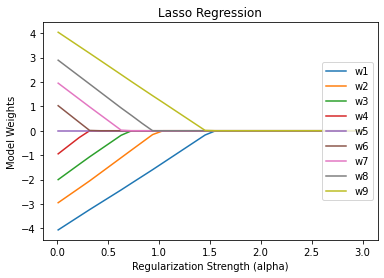

In [50]:
all_weights = np.zeros([9, 30])
index = 0
for a in np.linspace(0.01, 3, 30):
    lasso = Lasso(alpha=a)

    lasso.fit(X_train, y_train)
    weights = lasso.coef_
    all_weights[:, index] = weights
    index +=1

plt.figure()
for i in range(9):
    plt.plot(np.linspace(0.01, 3, 30), all_weights[i, :])

plt.legend(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'], loc='right')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Model Weights')
plt.title('Lasso Regression')

In [44]:
# Number of model weights that are exactly zero
# print(all_weights)
non_zeros = []
for i in range(30):
    non_zeros.append(np.count_nonzero(all_weights[:,i]))

print(non_zeros)

# Weights converge to zero at increasing alpha values

[8, 8, 8, 7, 6, 6, 6, 4, 4, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Ridge Regression')

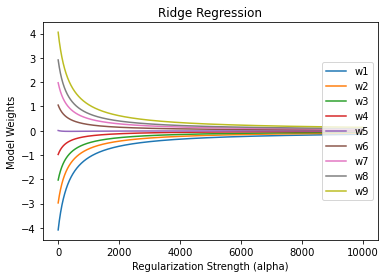

In [53]:
all_weights_2 = np.zeros([9, 10000])
index = 0
for a in range(1, 10001):
    ridge = Ridge(alpha=a)

    ridge.fit(X_train, y_train)
    weights = ridge.coef_
    all_weights_2[:, index] = weights
    index +=1

plt.figure()
x = [i for i in range(1, 10001)]
for i in range(9):
    plt.plot(x, all_weights_2[i, :])

plt.legend(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'], loc='right')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Model Weights')
plt.title('Ridge Regression')

In [57]:
# Number of model weights that are exactly zero
# print(all_weights)
non_zeros = []
values = []
for i in range(30):
    non_zeros.append(np.count_nonzero(all_weights_2[:,i]))
    values.append(all_weights_2[:,i])

print(non_zeros)
print(values)

# There are always 9 nonzero weights 

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[array([-4.08051417, -2.9694714 , -2.0275018 , -0.97597839,  0.01025025,
        1.05519988,  1.97491471,  2.91311104,  4.05321079]), array([-4.06959387, -2.96067452, -2.02139475, -0.97269195,  0.0098578 ,
        1.05188024,  1.9689698 ,  2.90402675,  4.04195765]), array([-4.05873141, -2.95192968, -2.01532404, -0.96942724,  0.00946988,
        1.0485815 ,  1.96306118,  2.89499903,  4.03076719]), array([-4.04792632, -2.9432364 , -2.00928933, -0.96618404,  0.00908645,
        1.04530348,  1.95718852,  2.88602733,  4.01963888]), array([-4.03717816, -2.93459424, -2.00329032, -0.96296215,  0.00870743,
        1.04204596,  1.95135147,  2.87711115,  4.0085722 ]), array([-4.02648649, -2.92600275, -1.99732669, -0.95976136,  0.00833277,
        1.03880877,  1.94554972,  2.86824997,  3.99756664]), array([-4.01585087, -2.91746147, -1.99139814, -0.95658147,  0.00796241,
        1.0355917 ,  1.93978293,  2.85